In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

                INCWAGE  parent_income      EDUC  parent_educ       AGE  \
INCWAGE        1.000000       0.188717  0.314153     0.134294  0.059729   
parent_income  0.188717       1.000000  0.231751     0.402304 -0.046262   
EDUC           0.314153       0.231751  1.000000     0.322047 -0.054258   
parent_educ    0.134294       0.402304  0.322047     1.000000 -0.064927   
AGE            0.059729      -0.046262 -0.054258    -0.064927  1.000000   
UHRSWORK       0.157322       0.029893  0.001325     0.014393  0.021700   

               UHRSWORK  
INCWAGE        0.157322  
parent_income  0.029893  
EDUC           0.001325  
parent_educ    0.014393  
AGE            0.021700  
UHRSWORK       1.000000  


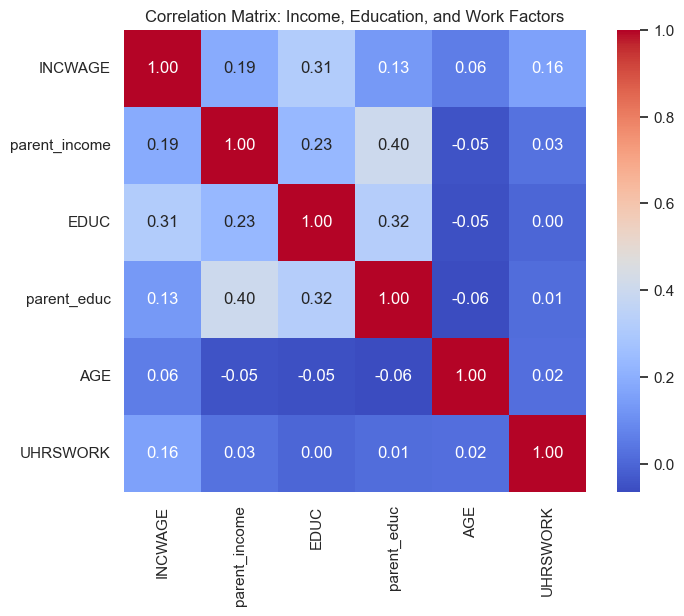

In [ ]:
data = pd.read_csv("filtered_data.csv")

corr_columns = ['INCWAGE', 'parent_income', 'EDUC', 'parent_educ', 'AGE', 'UHRSWORK']
corr_df = data[corr_columns]


correlation_matrix = corr_df.corr(method='pearson')

print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix: Income, Education, and Work Factors")
plt.show()

In [ ]:
data['SEX'] = data['SEX'].astype('category')
data['RACE'] = data['RACE'].astype('category')
# data['PWSTATE2'] = data['PWSTATE2'].astype('category')
data['OCC_CATEGORY'] = data['OCC_CATEGORY'].astype('category')


model = smf.ols(
    'INCWAGE ~ parent_income + EDUC + parent_educ + AGE + UHRSWORK + SEX + RACE + OCC_CATEGORY',
    data=data
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                INCWAGE   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     1377.
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        10:02:17   Log-Likelihood:            -1.3530e+06
No. Observations:              118215   AIC:                         2.706e+06
Df Residuals:                  118188   BIC:                         2.706e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

C:\Users\Baban\AppData\Local\Temp\ipykernel_32544\1813827870.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=coef_df, x=coef_df.index, y='Coefficient', join=False,
C:\Users\Baban\AppData\Local\Temp\ipykernel_32544\1813827870.py:26: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=coef_df, x=coef_df.index, y='Coefficient', join=False,
C:\Users\Baban\AppData\Local\Temp\ipykernel_32544\1813827870.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


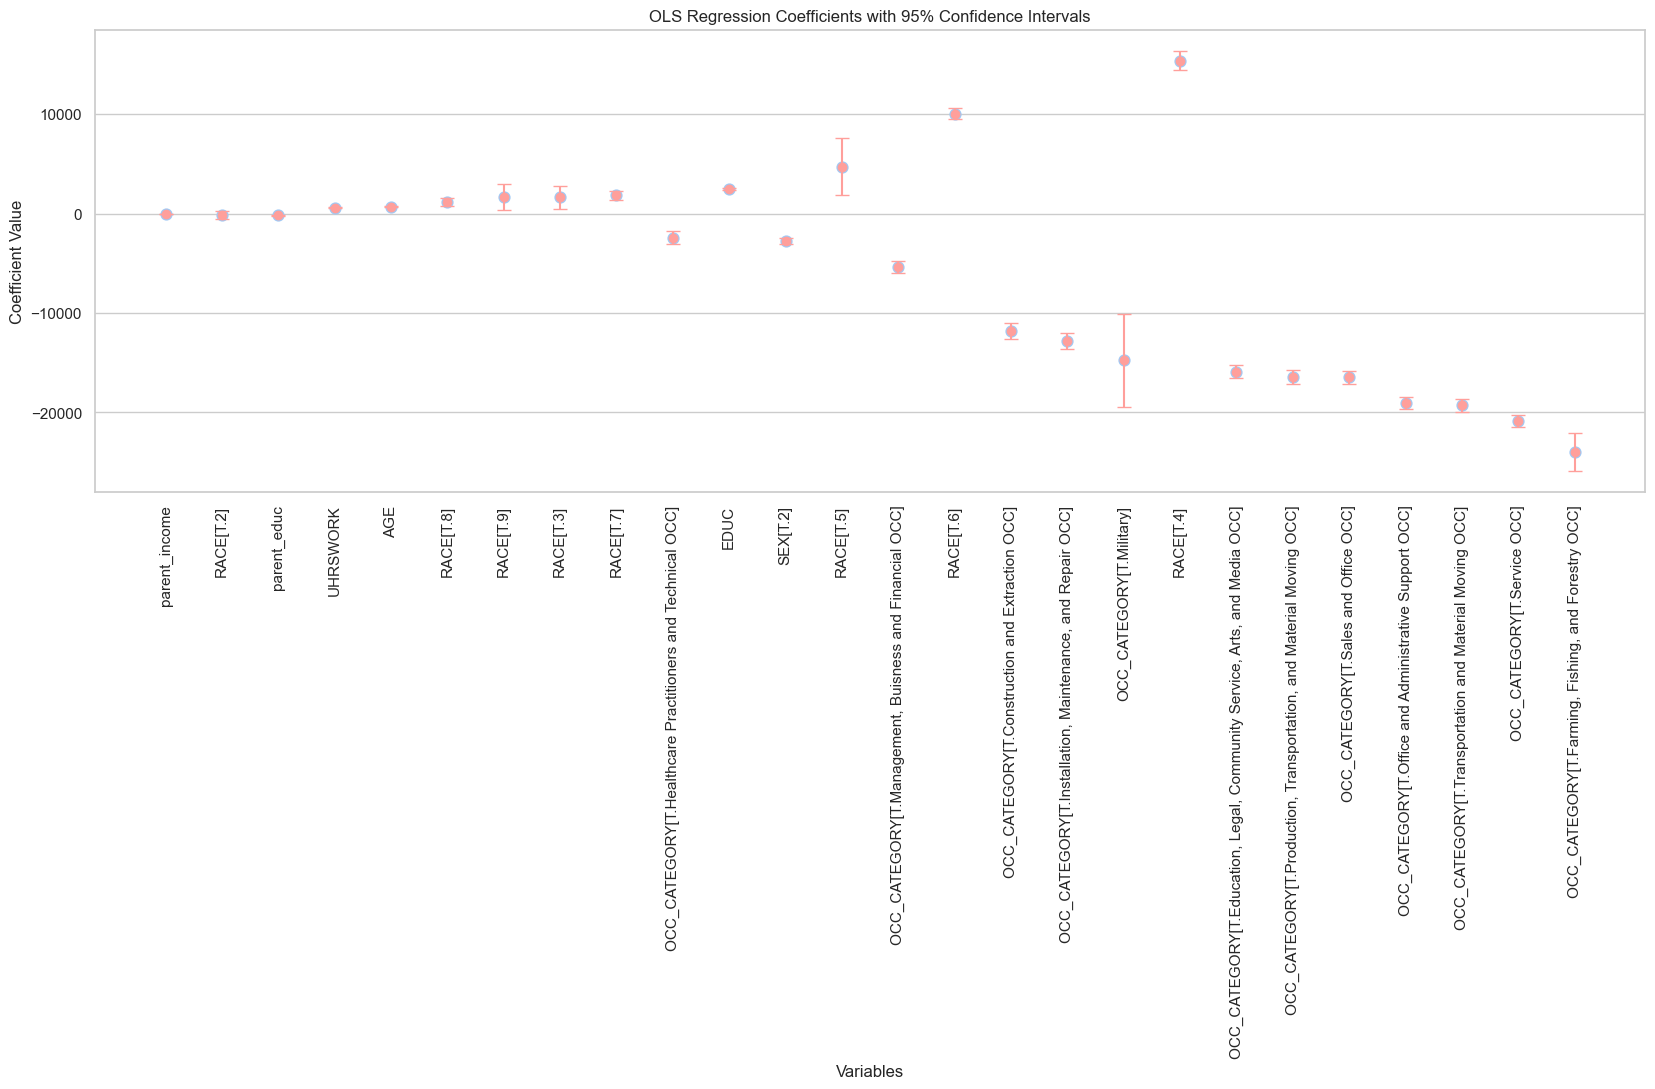

In [ ]:

coef = model.params
conf_int = model.conf_int()
pvalues = model.pvalues


coef_df = pd.DataFrame({
    'Coefficient': coef,
    'p-value': pvalues,
    'CI Lower': conf_int[0],
    'CI Upper': conf_int[1]
})


coef_df = coef_df.drop('Intercept', axis=0)


coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=True)


plt.figure(figsize=(20, 6))
sns.pointplot(data=coef_df, x=coef_df.index, y='Coefficient', join=False, 
              capsize=0.1, ci=None, color='b')


plt.errorbar(coef_df.index, coef_df['Coefficient'], 
             yerr=[coef_df['Coefficient'] - coef_df['CI Lower'], coef_df['CI Upper'] - coef_df['Coefficient']],
             fmt='o', color='r', capsize=5)

# Set labels and title
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.title('OLS Regression Coefficients with 95% Confidence Intervals')

# Show plot
plt.tight_layout()
plt.show()


C:\Users\Baban\AppData\Local\Temp\ipykernel_32544\752844152.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Coefficient", y="Variable", data=results, ci=None, palette="coolwarm")
C:\Users\Baban\AppData\Local\Temp\ipykernel_32544\752844152.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Variable", data=results, ci=None, palette="coolwarm")


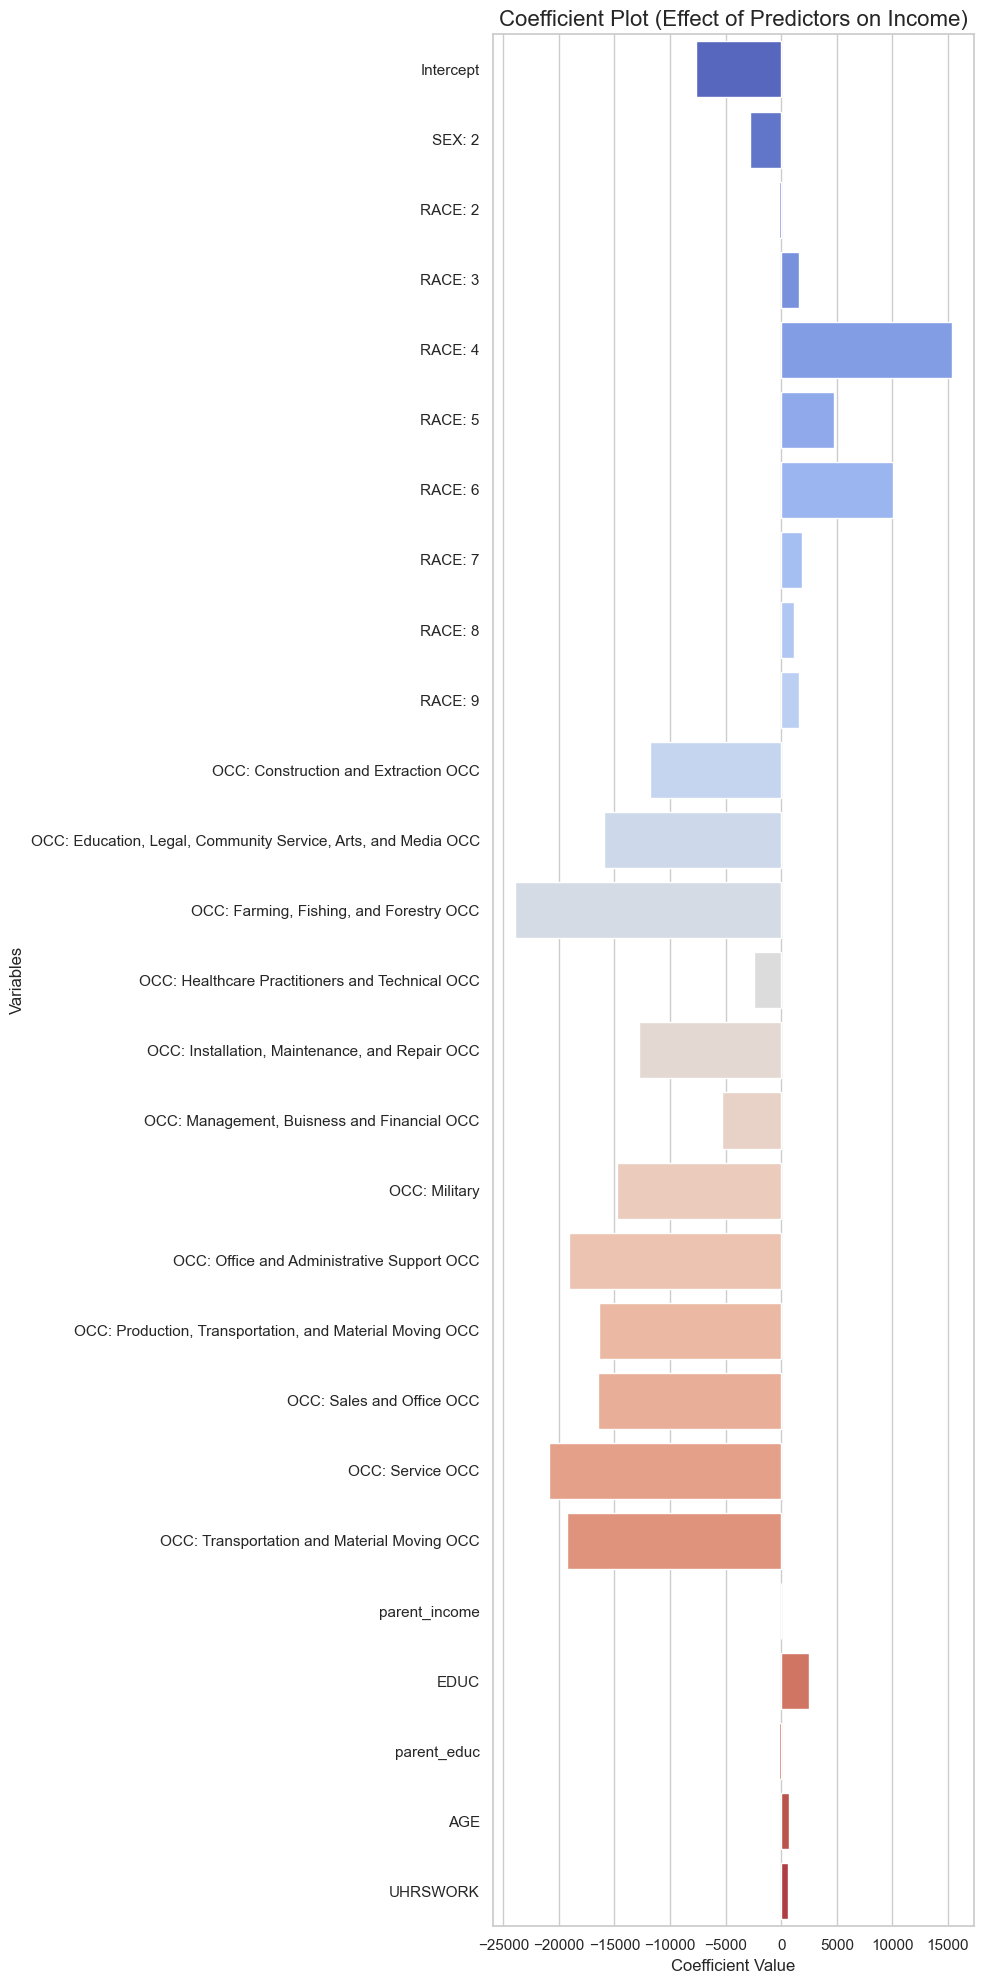

In [ ]:

coefficients = model.params
p_values = model.pvalues


results = pd.DataFrame({
    "Variable": coefficients.index,
    "Coefficient": coefficients.values,
    "P-value": p_values.values
})


race_categories = data['RACE'].cat.categories
sex_categories = data['SEX'].cat.categories
occ_categories = data['OCC_CATEGORY'].cat.categories


def replace_dummy_names(var_name):
    if var_name.startswith('RACE[T.'):
        label = var_name.split('T.')[1].rstrip(']')
        return f'RACE: {label}'
    elif var_name.startswith('SEX[T.'):
        label = var_name.split('T.')[1].rstrip(']')
        return f'SEX: {label}'
    elif var_name.startswith('OCC_CATEGORY[T.'):
        label = var_name.split('T.')[1].rstrip(']')
        return f'OCC: {label.replace("_", " ")}'
    return var_name


results["Variable"] = results["Variable"].apply(replace_dummy_names)


plt.figure(figsize=(10, 20))
sns.barplot(x="Coefficient", y="Variable", data=results, ci=None, palette="coolwarm")
plt.title('Coefficient Plot (Effect of Predictors on Income)', fontsize=16)
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()



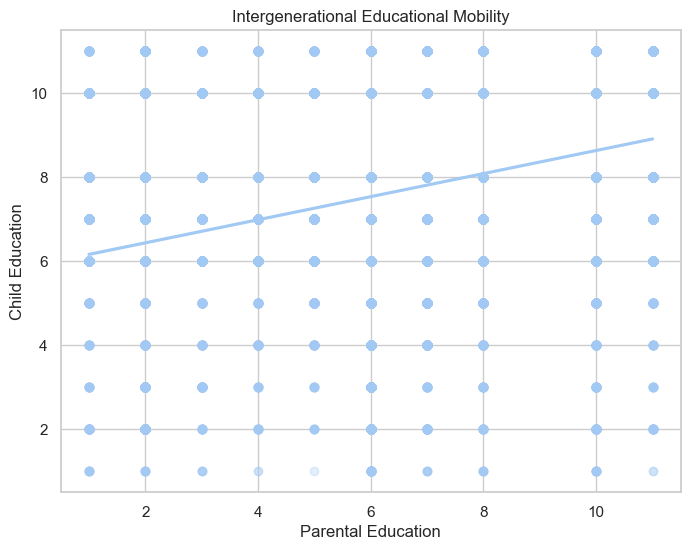

In [50]:
plt.figure(figsize=(8,6))
sns.regplot(data=data, x="parent_educ", y="EDUC", scatter_kws={'alpha':0.3})
plt.xlabel("Parental Education")
plt.ylabel("Child Education")
plt.title("Intergenerational Educational Mobility")
plt.grid(True)
plt.show()

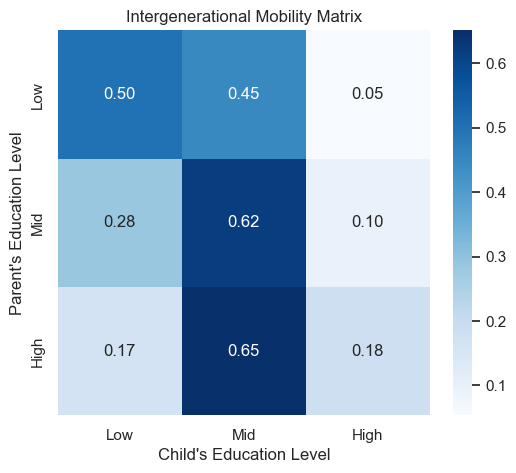

In [ ]:

data['parent_educ_bin'] = pd.qcut(data['parent_educ'], q=3, labels=["Low", "Mid", "High"])
data['child_educ_bin'] = pd.qcut(data['EDUC'], q=3, labels=["Low", "Mid", "High"])


mobility_matrix = pd.crosstab(data['parent_educ_bin'], data['child_educ_bin'], normalize='index')

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(mobility_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel("Child's Education Level")
plt.ylabel("Parent's Education Level")
plt.title("Intergenerational Mobility Matrix")
plt.show()
